In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Determinar si una persona ganara mas de 50k o no

### Carga de datos

In [2]:
dataOriginal = pd.read_csv("adult_data.csv")

# fnlwgt: numero de personas que representa la entrada
dataOriginal.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
                "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", 
                "salary"] #este es el que queremos predecir

print(dataOriginal.shape) #32561 casos
dataOriginal.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Creamos una copia del dataframe para trabajarla

dataModificada = dataOriginal.copy();

dataModificada.shape

(32561, 15)

## Procesamiento

### Valores perdidos 

In [4]:
# revisamos si hay valores perdidos

def buscarValoresPerdidos(df, parametros):
    
    columnaConValoresPerdidos = []

    for parametro in parametros:  
        cantPerdida = df[parametro].apply(lambda x: 1 if (x == " ?") else 0).sum()
        if(cantPerdida > 0): 
            
            columnaConValoresPerdidos.append(str(parametro) + ": " + str(cantPerdida))
            
    if (len(columnaConValoresPerdidos) == 0): return "Sin valores perdidos"
            
    return columnaConValoresPerdidos

buscarValoresPerdidos(dataModificada, ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
                                       "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
                                       "hours-per-week", "native-country", "salary"])

['workclass: 1836', 'occupation: 1843', 'native-country: 583']

In [5]:
# hay valores perdidos en workclass, occupation y native-country. Representan el 5% del total, vamos a eliminarlo

for parametro in ["workclass",  "occupation", "native-country"]:
    indexEliminar=dataModificada[dataModificada[parametro] == " ?"].index
    dataModificada=dataModificada.drop(indexEliminar)

buscarValoresPerdidos(dataModificada,["workclass",  "occupation", "native-country"])


'Sin valores perdidos'

In [6]:
dataModificada.shape

(30162, 15)

Se elimino la data perdida. Se redujo de 32561 a 30162 (7%)

### Eliminamos columnas no utiles

In [7]:
# Eliminamos la columna education-num, ya que es equivalente a education y fnlwgt ya que para lo que queremos analizar no 
# nos es util

dataModificada = dataModificada.drop(columns=["education-num", "fnlwgt"])
dataModificada

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Paso de valores escritos a numericos

In [8]:
# workclass, marital-status, occupation, relationship, race, sex y native-country son parametros texto
# es necesario pasarlos a numerico
# vemos como esta compuesto cada uno

for parametro in ["workclass", "education", "marital-status", "occupation",
                  "relationship", "race", "sex", "native-country"]:

    print(str(parametro) + ': ' + str(dataModificada[parametro].unique().size))
    print(dataModificada[parametro].unique())
    print("")
    

workclass: 7
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

education: 16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

marital-status: 7
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation: 14
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

relationship: 6
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race: 5
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex: 2
[' Male' ' Female']

native-country: 41
[' United-States' ' Cuba' ' Jamaica' ' 

In [9]:
def oneHotEncoding(df, columnas):
    
    # Elimino las columnas a las que hare one hot
    dataModificadaTemp = df.drop(columns=columnas)

    # Usamos la funcion pd.get_dummies para hacer one hot encoding 
    oneHot = pd.get_dummies(df[columnas])

    # unimos todo
    return pd.concat([dataModificadaTemp, oneHot], axis=1)

dataModificada = oneHotEncoding(dataModificada, ["workclass", "education", "marital-status",
                                "occupation", "relationship", "race", "sex", "native-country"])

dataModificada.head()

,age,capital-gain,capital-loss,hours-per-week,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174,0,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,<=50K,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analisamos las columnas numericas

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

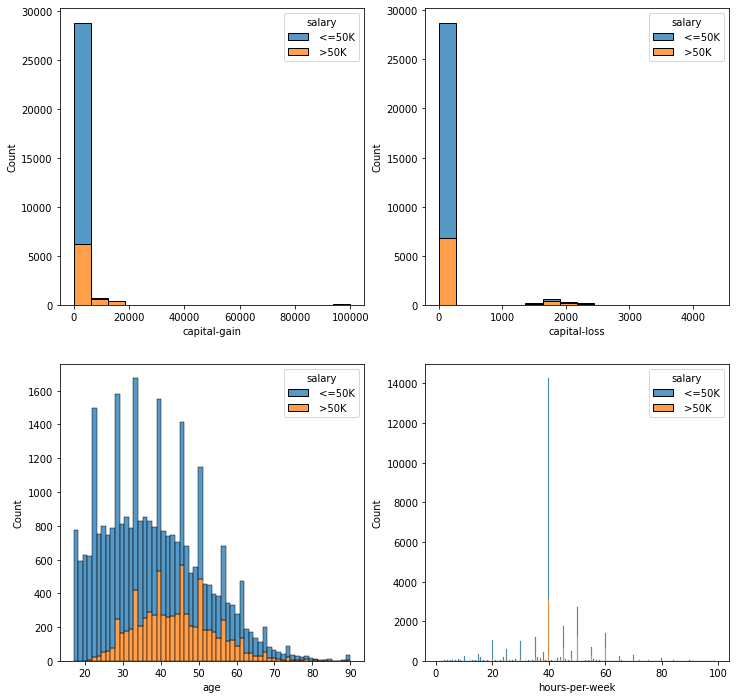

In [10]:
# Vamos a ver age, capital-gain, capital-loss, hours-per-week

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.histplot(data= dataModificada, x= "capital-gain",   hue= "salary",  multiple="stack", ax=axes[0,0])
sns.histplot(data= dataModificada, x= "capital-loss",   hue= "salary",  multiple="stack", ax=axes[0,1])
sns.histplot(data= dataModificada, x= "age",            hue= "salary",  multiple="stack", ax=axes[1,0])
sns.histplot(data= dataModificada, x= "hours-per-week", hue= "salary",  multiple="stack", ax=axes[1,1])


In [11]:
dataModificada[["capital-gain", "capital-loss", "age", "hours-per-week"]].describe()

,capital-gain,capital-loss,age,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,1092.007858,88.372489,38.437902,40.931238
std,7406.346497,404.298370,13.134665,11.979984
min,0.000000,0.000000,17.000000,1.000000
25%,0.000000,0.000000,28.000000,40.000000
50%,0.000000,0.000000,37.000000,40.000000
75%,0.000000,0.000000,47.000000,45.000000
max,99999.000000,4356.000000,90.000000,99.000000


<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

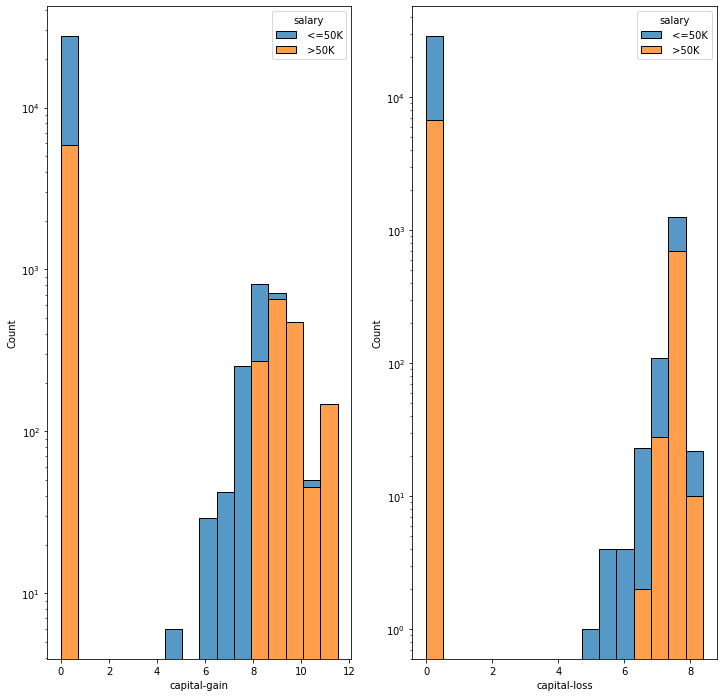

In [12]:
# los datos de capital-gain y capital-loss son muy grandes y dispares (se ve con el std)
# vamos a pasarlo a escala logaritmica para una mejor implementacion

dataModificada["capital-gain"] = np.where(dataModificada["capital-gain"] == 0, 1, dataModificada["capital-gain"]) 
dataModificada["capital-loss"] = np.where(dataModificada["capital-loss"] == 0, 1, dataModificada["capital-loss"]) 
# si se deja los valores de '0' el log daria error, por ello se pasa a 1 que el log dara 0

dataModificada[["capital-gain", "capital-loss"]] = np.log(dataModificada[["capital-gain", "capital-loss"]])
#dataModificada["capital-gain", "capital-loss"] = np.log(dataModificada["capital-gain", "capital-loss"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

sns.histplot(data= dataModificada, x= "capital-gain", hue= "salary", multiple="stack", 
             log_scale=(False, True), ax=axes[0])

sns.histplot(data= dataModificada, x= "capital-loss", hue= "salary", multiple="stack",
             log_scale=(False, True),  ax=axes[1])

In [13]:
dataModificada[["capital-gain", "capital-loss"]].describe()

,capital-gain,capital-loss
count,30162.000000,30162.000000
mean,0.743627,0.355199
std,2.470462,1.594890
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512915,8.379309


Los valores de capital-gain pasaron de 0-99999 a 0-12. Los valores de capital-loss pasaron de 0-4300 a 0-8

In [14]:
print("capital-gain: " + str(dataModificada["capital-gain"].apply(lambda x: 1 if (x == 0) else 0).sum()/30162))
print("capital-loss: " + str(dataModificada["capital-loss"].apply(lambda x: 1 if (x == 0) else 0).sum()/30162))
print("Horas por semana: " + str(dataModificada["hours-per-week"].apply(lambda x: 1 if (x > 70) else 0).sum()/30162))

capital-gain: 0.9158543863139049
capital-loss: 0.9526888137391419
Horas por semana: 0.015250978051853326


Si bien capital gain y loss esta concetrado en 0, por el momento lo vamos a dejar, a posteriori se analizara si afecta el eliminarlo. En las horas por semana hay un 1% que supera mas de 70hs (serian mas de 10 horas todos los dias). Vamos a realizar una deteccion de anomalias

C:\Users\ignacio.milesi\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


25.0: 0.10811617266759499
60.0: 0.08146011537696439


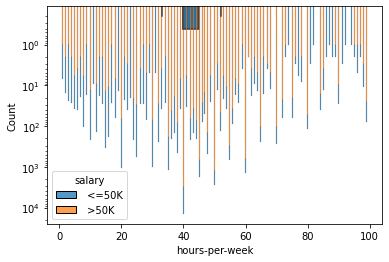

In [15]:
sns.boxplot(dataModificada['hours-per-week'])
sns.histplot(data= dataModificada, x= "hours-per-week", hue= "salary", multiple="stack", log_scale=(False, True))

def rango_anomalia(df, parametro):
    IQR = df[parametro].quantile(0.75) - df[parametro].quantile(0.25)
    
    lower_range = df[parametro].quantile(0.25) - (2 * 1.5 * IQR)
    upper_range = df[parametro].quantile(0.75) + (2 * 1.5 * IQR)
    
    print(str(lower_range) + ": " + 
          str(dataModificada["hours-per-week"].apply(lambda x: 1 if (x <= lower_range ) else 0).sum()/30162))
    
    print(str(upper_range) + ": " + 
          str(dataModificada["hours-per-week"].apply(lambda x: 1 if (x >= upper_range ) else 0).sum()/30162))
    #df.loc[df[parametro] <= lower_range, parametro] = lower_range
    #df.loc[df[parametro] >= upper_range, parametro] = upper_range
    
rango_anomalia(dataModificada, 'hours-per-week')


C:\Users\ignacio.milesi\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

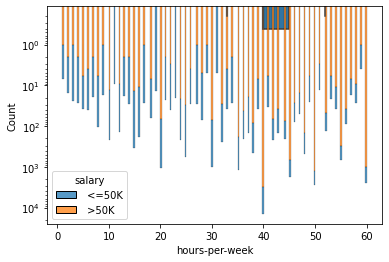

In [16]:
def eliminar_anomalia_superior(df, parametro):
    IQR = df[parametro].quantile(0.75) - df[parametro].quantile(0.25)
    
    upper_range = df[parametro].quantile(0.75) + (2 * 1.5 * IQR)
    
    df.loc[df[parametro] >= upper_range, parametro] = upper_range
    
eliminar_anomalia_superior(dataModificada, 'hours-per-week')

sns.boxplot(dataModificada['hours-per-week'])
sns.histplot(data= dataModificada, x= "hours-per-week", hue= "salary", multiple="stack", log_scale=(False, True))

### Vamos por el salary 

In [17]:
# Vemos que valores hay

dataModificada['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
# solo hay dos valores: mayor a 50K y menor a 50K
# cambiamos a 1 y 0: 1 para mayot a 50K

dataModificada["salary"] = np.where(dataModificada["salary"] == ' >50K', 1, 0)

dataModificada['salary'].unique()

array([0, 1])

Los valores pasaron de "<=50K", ">50K" a 0 y 1

## Entrenamiento

### LogisticRegression 1 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = dataModificada.drop(columns=["salary"])
y = dataModificada["salary"]

print("X:")
print(X.shape)
print("")
print("y:")
print(y.shape)
print(y.value_counts())

X:
(30162, 102)

y:
(30162,)
0    22654
1     7508
Name: salary, dtype: int64


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Train data shape: (24129, 102)
Test data shape: (6033, 102)


In [22]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(solver= "liblinear")

In [23]:
lg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
y_pred = lg_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test, y_pred)))

Accuracy Score: 0.8463451019393337

Confusion Matrix:
 [[4188  315]
 [ 612  918]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4503
           1       0.74      0.60      0.66      1530

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



### LogisticRegression 2 

Vamos a realizar la prueba pero eliminando la columna de capital-gain y capital-loss

In [26]:
X2 = dataModificada.drop(columns=["salary", "capital-gain", "capital-loss"])

print("X2:")
print(X2.shape)
print("")
print("y:")
print(y.shape)
print(y.value_counts())

X2:
(30162, 100)

y:
(30162,)
0    22654
1     7508
Name: salary, dtype: int64


In [27]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

print("Train data shape: {}".format(X_train2.shape))
print("Test data shape: {}".format(X_test2.shape))

Train data shape: (24129, 100)
Test data shape: (6033, 100)


In [28]:
lg_model2 = LogisticRegression(solver= "liblinear")
lg_model2.fit(X_train2, y_train2)

LogisticRegression(solver='liblinear')

In [29]:
y_pred2 = lg_model2.predict(X_test2)

In [30]:
print("Accuracy Score: {}".format(accuracy_score(y_test2, y_pred2)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test2, y_pred2)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test2, y_pred2)))

Accuracy Score: 0.8319244157135753

Confusion Matrix:
 [[4158  345]
 [ 669  861]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4503
           1       0.71      0.56      0.63      1530

    accuracy                           0.83      6033
   macro avg       0.79      0.74      0.76      6033
weighted avg       0.82      0.83      0.82      6033



In [31]:
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred2)))

Accuracy con capital gain y loss: 0.8463451019393337
Accuracy sin capital gain y loss: 0.8319244157135753


 La presision disminuye poco, podria obviarse para el analisis

### Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred_tree = tree_model.predict(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_tree)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred_tree)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test, y_pred_tree)))

Accuracy Score: 0.8138571191778551

Confusion Matrix:
 [[3970  533]
 [ 590  940]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      4503
           1       0.64      0.61      0.63      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



In [35]:
tree_model2 = DecisionTreeClassifier()

tree_model2.fit(X_train2, y_train2)

y_pred_tree2 = tree_model2.predict(X_test2)

print("Accuracy Score: {}".format(accuracy_score(y_test2, y_pred_tree2)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test2, y_pred_tree2)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test2, y_pred_tree2)))

Accuracy Score: 0.7767279960218797

Confusion Matrix:
 [[3879  624]
 [ 723  807]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4503
           1       0.56      0.53      0.55      1530

    accuracy                           0.78      6033
   macro avg       0.70      0.69      0.70      6033
weighted avg       0.77      0.78      0.77      6033



In [36]:
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_tree)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_tree2)))

Accuracy con capital gain y loss: 0.8138571191778551
Accuracy sin capital gain y loss: 0.7767279960218797


La presision disminuye mas significativamente, si se utiliza el decision tree , no se podria obviar para el analisis

In [37]:
print("LogisticRegression:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred2)))
print("")
print("Decision Tree:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_tree)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_tree2)))

LogisticRegression:
Accuracy con capital gain y loss: 0.8463451019393337
Accuracy sin capital gain y loss: 0.8319244157135753

Decision Tree:
Accuracy con capital gain y loss: 0.8138571191778551
Accuracy sin capital gain y loss: 0.7767279960218797


El logistic Regression tendria mejor presicion

### Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
forest_model = RandomForestClassifier()

forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_pred_forest = forest_model.predict(X_test)

print("Accuracy Score: {}".format(accuracy_score(y_test, y_pred_forest)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test, y_pred_forest)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test, y_pred_forest)))

Accuracy Score: 0.8436930217139068

Confusion Matrix:
 [[4100  403]
 [ 540  990]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      4503
           1       0.71      0.65      0.68      1530

    accuracy                           0.84      6033
   macro avg       0.80      0.78      0.79      6033
weighted avg       0.84      0.84      0.84      6033



La presicion mejoro encomparacion con el tree

In [41]:
forest_model2 = RandomForestClassifier()

forest_model2.fit(X_train2, y_train2)

y_pred_forest2 = forest_model2.predict(X_test2)

print("Accuracy Score: {}".format(accuracy_score(y_test2, y_pred_forest2)))
print("")
print("Confusion Matrix:\n {}".format(confusion_matrix(y_test2, y_pred_forest2)))
print("")
print("Classification Report:\n {}".format(classification_report(y_test2, y_pred_forest2)))

Accuracy Score: 0.8097132438256257

Confusion Matrix:
 [[4005  498]
 [ 650  880]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      4503
           1       0.64      0.58      0.61      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.73      0.74      6033
weighted avg       0.80      0.81      0.81      6033



In [42]:
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_forest)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_forest2)))

Accuracy con capital gain y loss: 0.8436930217139068
Accuracy sin capital gain y loss: 0.8097132438256257


La presision disminuye mas significativamente, si se utiliza el random forest , no se podria obviar para el analisis

In [43]:
print("LogisticRegression:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred2)))
print("")
print("Decision Tree:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_tree)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_tree2)))
print("")
print("Random Forest:")
print("Accuracy con capital gain y loss: {}".format(accuracy_score(y_test, y_pred_forest)))
print("Accuracy sin capital gain y loss: {}".format(accuracy_score(y_test2, y_pred_forest2)))

LogisticRegression:
Accuracy con capital gain y loss: 0.8463451019393337
Accuracy sin capital gain y loss: 0.8319244157135753

Decision Tree:
Accuracy con capital gain y loss: 0.8138571191778551
Accuracy sin capital gain y loss: 0.7767279960218797

Random Forest:
Accuracy con capital gain y loss: 0.8436930217139068
Accuracy sin capital gain y loss: 0.8097132438256257


Logistic regression (con y sin capital gain y loss) y Random Fores (con capital gain y loss) son los de mejor presicion

## Analisis de curva

Vamos a analizas el modelo, viendo su precision, para ver si faltarian datos o hay sobreajuste. Para esto solo vamos usar el LogisticRegression con capital gain y loss

500 de 8000
1000 de 8000
1500 de 8000
2000 de 8000
2500 de 8000
3000 de 8000
3500 de 8000
4000 de 8000
4500 de 8000
5000 de 8000
5500 de 8000
6000 de 8000
6500 de 8000
7000 de 8000
7500 de 8000



Precision del entrenamiento: 0.8456057007125891
Precision del entrenamiento: 0.8448533068125311


<AxesSubplot:>

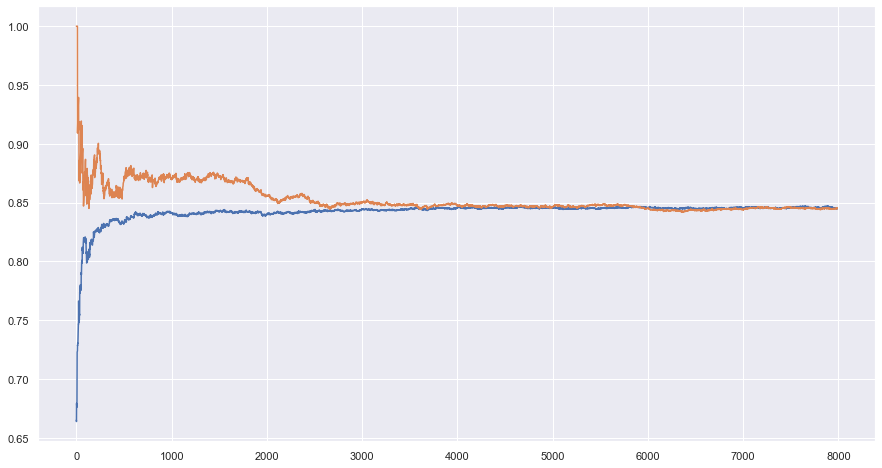

In [60]:
acc_train = []
acc_test = []

#Tomamos solo los primeros 8000 casos ya que a esa cantidad ya converge

for i in range(10, 8000):
    
    X_prueba = X_train.iloc[0:i]
    y_prueba = y_train.iloc[0:i]
    
    lg_model_prueba = LogisticRegression(solver= "liblinear")
    
    lg_model_prueba.fit(X_prueba, y_prueba)
    
    y_pred_prueba = lg_model_prueba.predict(X_test)
    y_pred_train_prueba = lg_model_prueba.predict(X_prueba)
    
    acc_test.append(accuracy_score(y_test, y_pred_prueba))
    acc_train.append(accuracy_score(y_prueba, y_pred_train_prueba))
    
    if (i%500 == 0): print(str(i) + " de 8000")
    
print("")
print("")
print("")
print("Precision del entrenamiento: " + str(acc_train.pop()))
print("Precision del test: " + str(acc_test.pop()))

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data = acc_test)
sns.lineplot(data = acc_train)

La Precision del conjunto de entrenamiento y el de prueba convergen al mismo valor. Implicaria que no se nesitaria mas casos y que no hay sobreajuste 